_Artificial Intelligence - The Final Project_

# Pump Impeller Quality Control Using CNN

### Students

- Hamed Aarab - 9925003
- Fateme Khodabande - 9825011
- Rosha Moshtaghian - 9825080

### Used Data

The data we used are available on [Kaggle](https://www.kaggle.com/ravirajsinh45/real-life-industrial-dataset-of-casting-product).

### Project Description

This project is basically a classification problem. Since we are dealing with images, we have decided to solve it with a convolutional neural neural network due to its abilities in image processing.

### Let's Get Started

To get started, we create the following project structure:

```
quality_control/
├── data/
│   ├── train/
│   │   ├── defective/
│   │   └── non_defective/
│   └── test
│       ├── defective/
│       └── non_defective/
└── quality_control.ipynb
```
Then, we load the images of defective and non-defective pump impellers in their respective folders. Note that our data were split into train and validation by default.


### Perquisites

The libraries we need include:

- Tensorflow for our CNN model.
- Numpy for transforming images to arrays.
- Matplotlib for visualizing our images.


In [113]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


### Data Visualization

First, we define a function for loading images in gray-scale mode.

Then, we define another function to get an image and visualize it using Matplotlib. This function transforms the image to an array and rescales its values to `[0, 1]`.


In [114]:
def get_image(path):
    return tf.keras.preprocessing.image.load_img(path, color_mode = 'grayscale')

def visualize_image(image):
    plt.figure()

    plt.imshow(
        tf.keras.preprocessing.image.img_to_array(image) / 255,
        cmap = 'gray',
    )

    plt.show()


#### Example Defective Image

Here's an example image of a defective pump impeller.


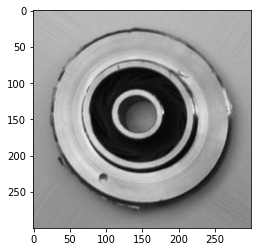

In [115]:
example_defective_image = get_image('./data/test/defective/cast_def_0_108.jpeg')

visualize_image(example_defective_image)


#### Example Non-Defective Image

And here's an example image of a non-defective pump impeller.


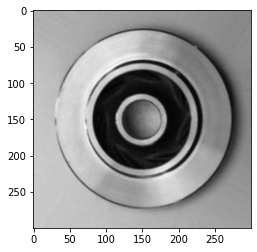

In [116]:
example_non_defective_image = get_image('./data/test/non_defective/cast_ok_0_1026.jpeg')

visualize_image(example_non_defective_image)


### Data Preprocessing

Now, we need to pre-process our data by loading and rescaling the train data and the test data separately.
To add randomness to our model later, we randomly zoom and shear the train data.


In [117]:
train_data = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1 / 255,
    zoom_range = 0.2,
    shear_range = 0.2,
).flow_from_directory(
    './data/train',
    class_mode = 'binary',
    batch_size = 8,
    target_size = (64, 64),
    color_mode = 'grayscale',
)

test_data = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1 / 255
).flow_from_directory(
    './data/test',
    class_mode = 'binary',
    batch_size = 8,
    target_size = (64, 64),
    color_mode = 'grayscale',
)


Found 6633 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


### Defining The CNN Model

Our CNN model is going to have two series of convolution and max pooling layers. Then, we flatten the output and pass it to an MLP with two hidden layers.

Finally, we compile our model with the adam optimizer and binary cross entropy loss function.


In [118]:
model = tf.keras.models.Sequential()

model.add(
    tf.keras.layers.Conv2D(
        filters = 8,
        kernel_size = (3, 3),
        activation = 'relu',
        padding = 'same',
        input_shape = (64, 64, 1),
    )
)

model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = 2))

model.add(
    tf.keras.layers.Conv2D(
        filters = 8,
        kernel_size = (3, 3),
        activation = 'relu',
        padding = 'same',
    )
)

model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = 2))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 128, activation = 'relu')) 
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy'],
)


### Training The CNN Model

Here, we train our model with 10 epochs and save the best one.


In [119]:
model.fit(train_data, validation_data = test_data, epochs = 10)

model.save('classifier_model.h5')


Epoch 1/10
830/830 [==============================] - 15s 17ms/step - loss: 0.5713 - accuracy: 0.6911 - val_loss: 0.3509 - val_accuracy: 0.8266
Epoch 2/10
830/830 [==============================] - 14s 16ms/step - loss: 0.3841 - accuracy: 0.8198 - val_loss: 0.4669 - val_accuracy: 0.7888
Epoch 3/10
830/830 [==============================] - 13s 16ms/step - loss: 0.2895 - accuracy: 0.8717 - val_loss: 0.4098 - val_accuracy: 0.7958
Epoch 4/10
830/830 [==============================] - 14s 16ms/step - loss: 0.2412 - accuracy: 0.9008 - val_loss: 0.2616 - val_accuracy: 0.8923
Epoch 5/10
830/830 [==============================] - 12s 15ms/step - loss: 0.1959 - accuracy: 0.9193 - val_loss: 0.5516 - val_accuracy: 0.7902
Epoch 6/10
830/830 [==============================] - 13s 15ms/step - loss: 0.1570 - accuracy: 0.9388 - val_loss: 0.2075 - val_accuracy: 0.9133
Epoch 7/10
830/830 [==============================] - 12s 15ms/step - loss: 0.1387 - accuracy: 0.9484 - val_loss: 0.2218 - val_accuracy:

### Testing The CNN Model

Let's test our model with the example images of defective and non-defective pump impellers.

First, we define a `predict` function to make things easier.


In [120]:
def predict(image):
    result = model.predict(
        np.expand_dims(
            tf.keras.preprocessing.image.img_to_array(
                image.resize((64, 64)),          
            ) / 255,
            axis = 0
        )
    )

    if result <= 0.5:
        print('Defective')
    else:
        print('Non-Defective')

#### Testing The Example Defective Image


In [121]:
predict(example_defective_image)


1/1 [==============================] - 0s 52ms/step
Defective


#### Testing The Example Non-Defective Image


In [122]:
predict(example_non_defective_image)


1/1 [==============================] - 0s 18ms/step
Non-Defective


### Conclusion

Our CNN model can classify images of pump impeller with an accuracy of ~93%.
